In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/katarzynakupczyk/PhD/Coding/video_prey_capture/notebooks


In [3]:
video = cv.VideoCapture('../raw_data/230315/Experiment0.avi')

In [4]:
video

< cv2.VideoCapture 0x1286ce530>

In [5]:
# Open the video file
cap = cv.VideoCapture('../raw_data/230315/Experiment0.avi')

# Loop through the video
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    
    # If the frame is read correctly, show it
    if ret:
        cv.imshow('Video', frame)
        
        # Wait for 25 milliseconds and check if the user pressed the 'q' key
        if cv.waitKey(25) & 0xFF == ord('q'):
            break
    # If the frame is not read correctly, exit the loop
    else:
        break

# Release the video capture and close the window
cap.release()
cv.destroyAllWindows()

In [5]:
diff = cv.absdiff(loaded_six, six)
# Convert the difference to grayscale
gray = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)
# Calculate the mean of the grayscale image
mean = cv.mean(gray)[0]
# Set a threshold value (adjust as needed)
threshold = 10
# Compare the mean value to the threshold
if mean < threshold:
    print("The images are similar.")
else:
    print("The images are different.")

NameError: name 'loaded_six' is not defined

In [ ]:
zero = 
five = 
six = 
templates = [zero, five, six]

# Open the video file
video = cv.VideoCapture('../raw_data/230315/Experiment0.avi')

# Read frames in video and extract cropped stimulus number 
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    
    # If the frame is read correctly, extract crop
    if ret:
        stimulus = np.array(frame[1052:1080,0:28])
        assert stimulus.shape == (28,28,3), "Wrong shape"
        
        # Calculate the difference between the images
        diff = cv.absdiff(stimulus, template)
        # Convert the difference to grayscale
        gray = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)
        # Calculate the mean of the grayscale image
        mean = cv.mean(gray)[0]
        # Set a threshold value (adjust as needed)
        threshold = 10
        # Compare the mean value to the threshold
        if mean < threshold:
            print("The images are similar.")
        else:
            print("The images are different.")
            

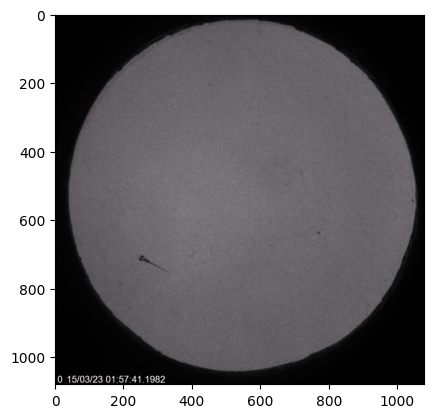

In [96]:
for i in range(1000):
    ret, frame = video.read()
plt.imshow(frame)

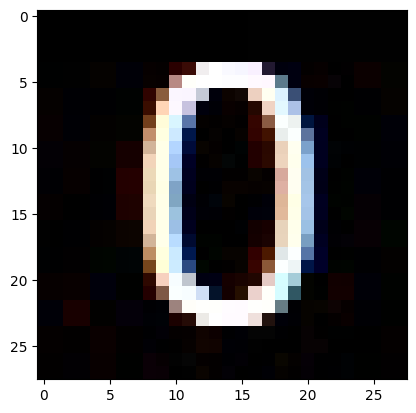

In [125]:
image = plt.imshow(frame[1052:1080,0:28],cmap='gray')

In [81]:
five = frame[1050:1078,0:28]

In [10]:
six = frame[1050:1078,0:28]

In [126]:
zero = frame[1050:1078,0:28]

In [127]:
zero.shape

(28, 28, 3)

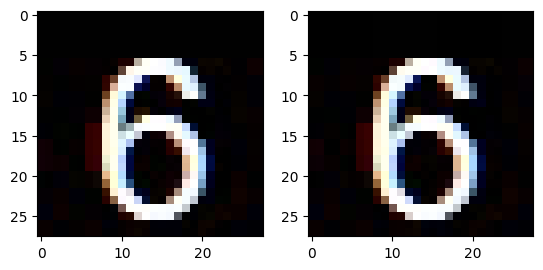

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(six,cmap='gray')
ax2.imshow(template,cmap='gray')

In [94]:
# six = pd.DataFrame(six[:,:,0])
# five = pd.DataFrame(five[:,:,0])
# zero = pd.DataFrame(zero[:,:,0])

In [99]:
zero = pd.DataFrame(zero[:,:,0])

In [100]:
six.to_csv('../stim_templates/six.csv')
five.to_csv('../stim_templates/five.csv')
zero.to_csv('../stim_templates/zero.csv')

In [113]:
loaded_six.drop(columns='Unnamed: 0',inplace=True)

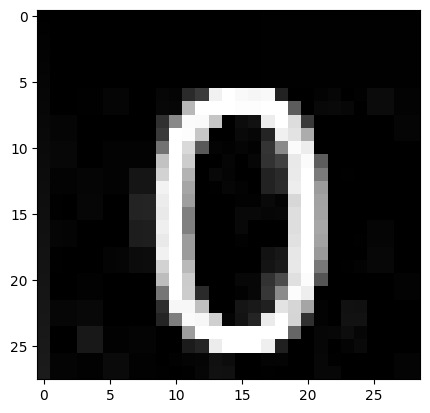

In [108]:
loaded_six = pd.read_csv('../stim_templates/six.csv')
loaded_five = pd.read_csv('../stim_templates/five.csv')
loaded_zero = pd.read_csv('../stim_templates/zero.csv')
plt.imshow(loaded_six,cmap='gray')
plt.imshow(loaded_five,cmap='gray')
plt.imshow(loaded_zero,cmap='gray')

In [118]:
loaded_six.dtype

dtype('int64')

In [122]:
six.dtype

dtype('int64')

In [121]:
six = np.int64(six)

In [129]:
loaded_six = np.array(pd.read_csv('../stim_templates/six.csv').drop(columns="Unnamed: 0"))

In [131]:
loaded_six.shape

(28, 28)

In [140]:
six.dtype

dtype('uint8')

In [139]:
six3D = np.stack((loaded_six,loaded_six,loaded_six),axis=2)
six3D.dtype

dtype('int64')

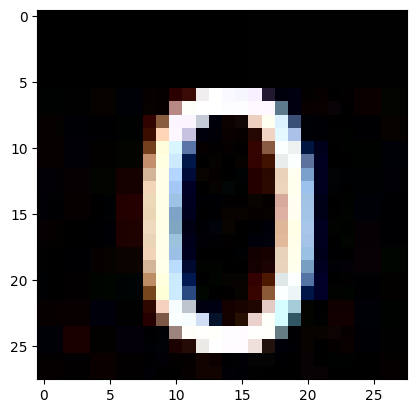

In [144]:
plt.imshow(six)

In [149]:
zero = frame[1050:1078,0:28]
loaded_six = np.uint8(np.array(pd.read_csv('../stim_templates/six.csv').drop(columns="Unnamed: 0")))
six3D = np.stack((loaded_six,loaded_six,loaded_six),axis=2)

# Calculate the difference between the images
diff = cv.absdiff(zero, six3D)

# Convert the difference to grayscale
gray = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)

# Calculate the mean of the grayscale image
mean = cv.mean(gray)[0]

# Set a threshold value (adjust as needed)
threshold = 10

# Compare the mean value to the threshold
if mean < threshold:
    print("The images are similar.")
else:
    print("The images are different.")

The images are different.


In [ ]:
import cv2

# Define input and output file names and criteria for splitting
input_file = '../raw_data/230315/Experiment0.avi'
output_prefix = 'output_video_'
split_criteria = range(1, 10)

# Define input and output video objects
cap = cv2.VideoCapture(input_file)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
out = None

# Loop through each frame in the input video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale and threshold to isolate the number
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours and bounding boxes
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Check if the contour is in the bottom left corner and meets the split criteria
        if x < 100 and y > frame_height - 100 and w > 50 and h > 50:
            number = int(gray[y:y+h, x:x+w].mean() / 255)
            if number in split_criteria:
                # If criteria are met, start a new output video file
                if out:
                    out.release()
                filename = output_prefix + str(number) + '.avi'
                out = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

                # Write the current frame to the output video file
                if out:
                    out.write(frame)

        # Release the input and output video objects
        cap.release()
        if out:
            out.release()